In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
# Shape of the Data 

print("DataFrame Shape:")
print(df.shape)

print("\nMissing Values Count:")
print(df.isnull().sum())

print("Desc of the numeric Data")

print(df.describe)

DataFrame Shape:
(891, 15)

Missing Values Count:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Desc of the numeric Data
<bound method NDFrame.describe of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0     

In [18]:
# Data Cleaning
# Fill missing age with the median, a robust measure against outliers.
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)

print(df.isnull().sum())

df.drop('deck' , axis=1)

print(df.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


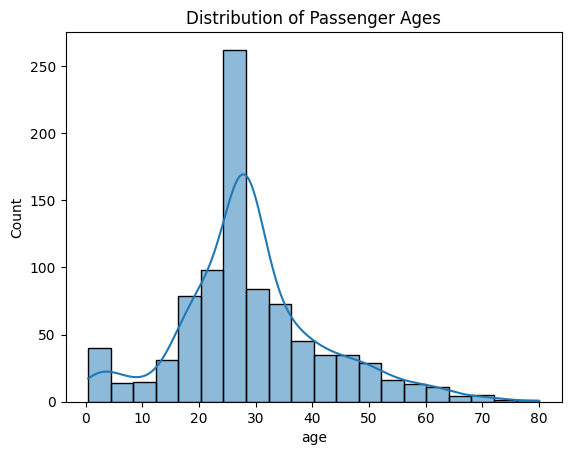

In [24]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Passenger Ages')
plt.show()


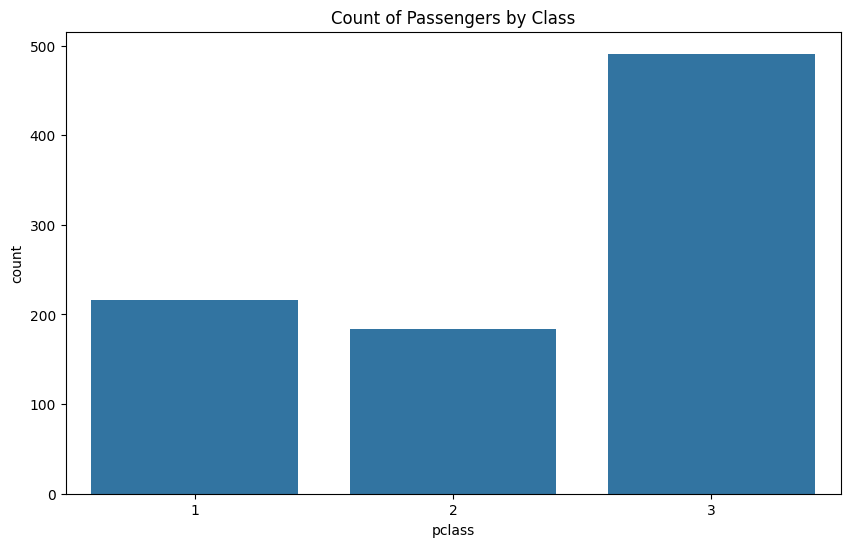

In [ ]:
sns.countplot(x='pclass', data=df)
plt.title('Count of Passengers by Class')
plt.show()

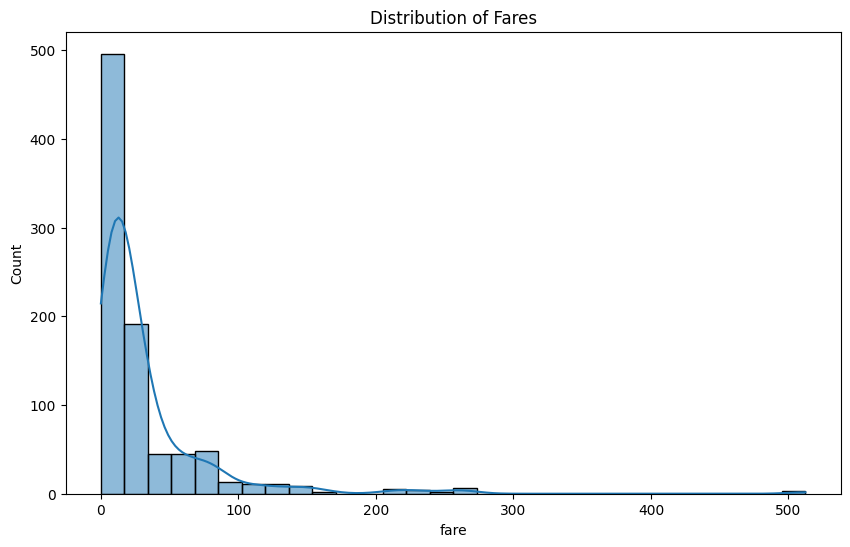

--------------------------------------------------


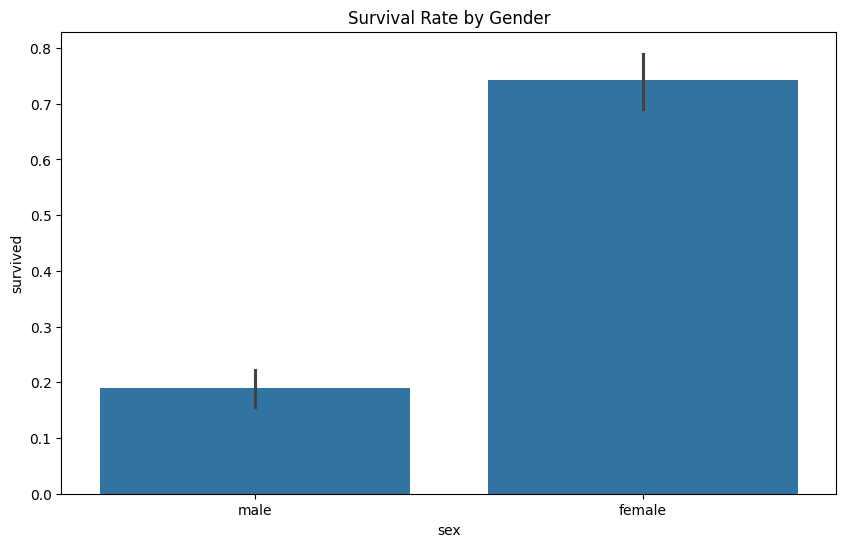

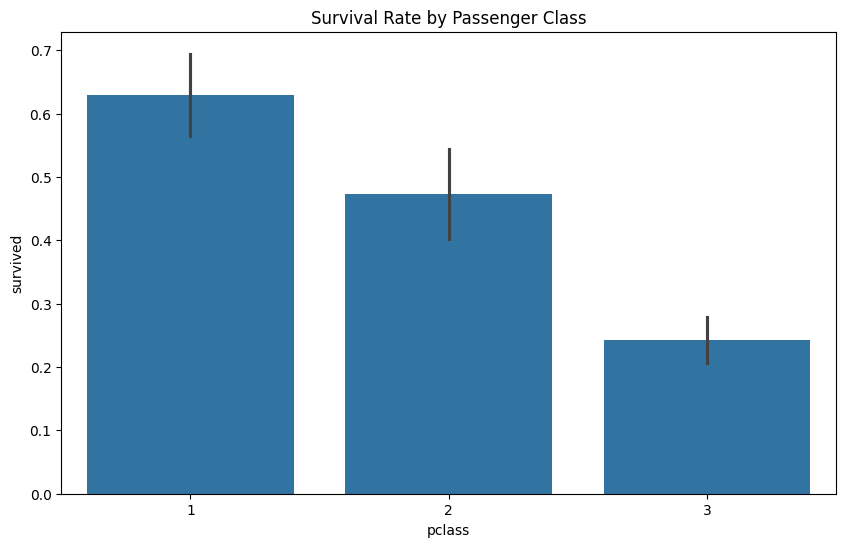

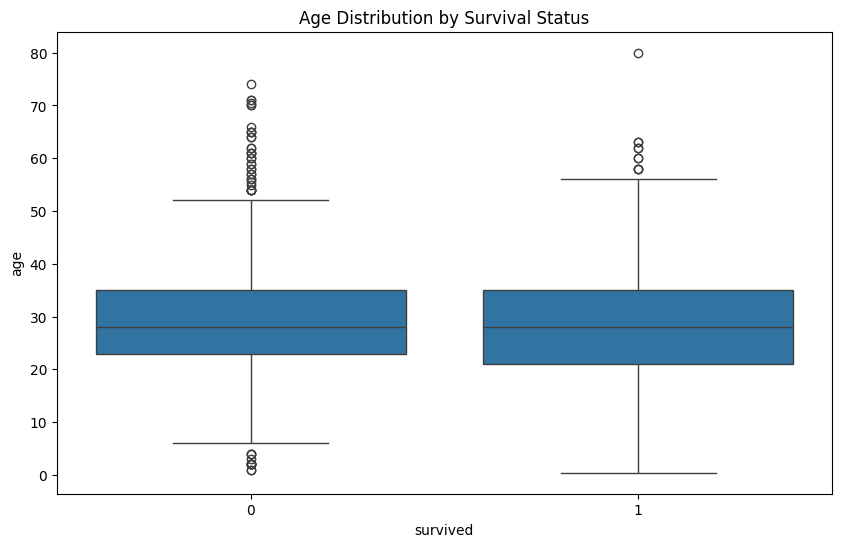

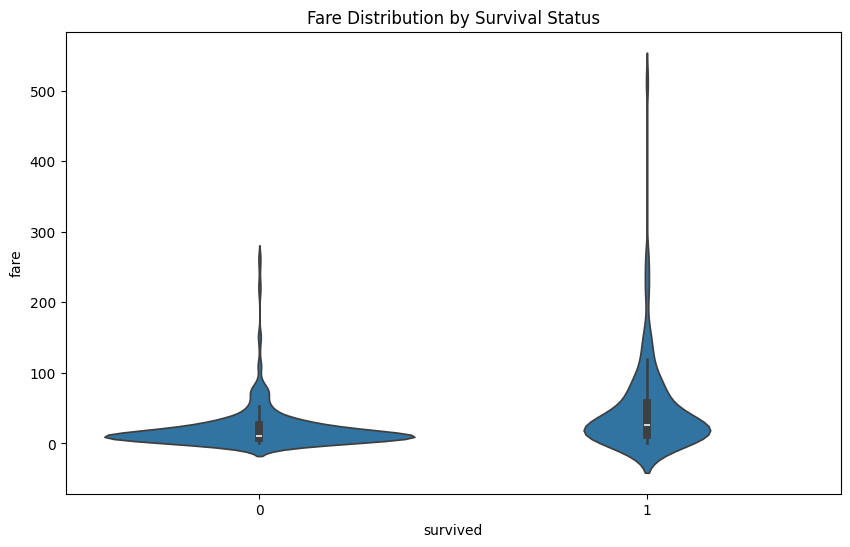

--------------------------------------------------


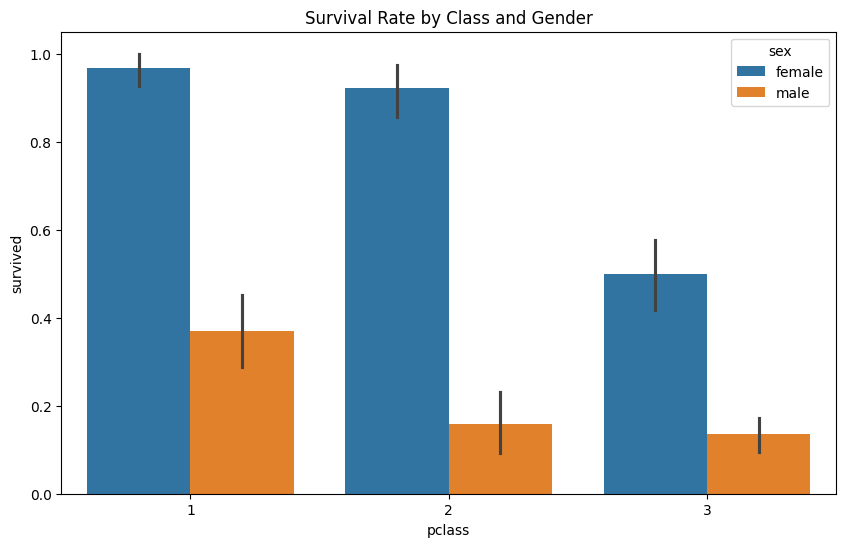

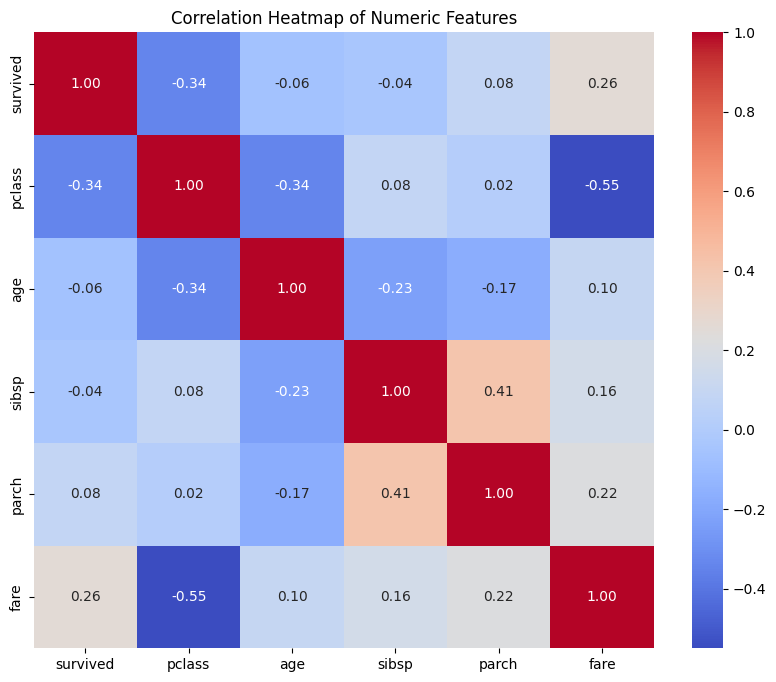

--------------------------------------------------
Key Insights from the Titanic Dataset Analysis:

1. Gender played a significant role in survival; women had a much higher survival rate than men.
2. Passenger class was a major factor in survival. First-class passengers had a significantly higher survival rate than those in second and third class.
3. There is a positive correlation between fare and survival rate. Passengers who paid higher fares had a better chance of surviving.
4. Most passengers were in the third class, followed by first and then second class.
5. Age appears to have a weak correlation with survival, but a higher proportion of younger passengers and children survived compared to adults.


In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fare'], bins=30, kde=True)
plt.title('Distribution of Fares')
plt.show()
print("-" * 50)

# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Distribution by Survival Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='survived', y='fare', data=df)
plt.title('Fare Distribution by Survival Status')
plt.show()
print("-" * 50)

# Multivariate Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', hue='sex', data=df)
plt.title('Survival Rate by Class and Gender')
plt.show()

plt.figure(figsize=(10, 8))
# Select only numeric columns for the heatmap
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()
print("-" * 50)

# Insights
print("Key Insights from the Titanic Dataset Analysis:\n")
print("1. Gender played a significant role in survival; women had a much higher survival rate than men.")
print("2. Passenger class was a major factor in survival. First-class passengers had a significantly higher survival rate than those in second and third class.")
print("3. There is a positive correlation between fare and survival rate. Passengers who paid higher fares had a better chance of surviving.")
print("4. Most passengers were in the third class, followed by first and then second class.")
print("5. Age appears to have a weak correlation with survival, but a higher proportion of younger passengers and children survived compared to adults.")
